# Comparing time-series similarity using some basic examples

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [37]:
import seaborn as sns

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

In [39]:
patterns = [
    
    #steadily increasing
    [1,2,3,4,5,6,7,8],
    [3,4,5,6,7,8,9,10],

    # holding at a high level
    [6,6,6,6,6,6,6,6],
    [8,8,8,8,8,8,8,8],
    
    
    # random walk near 0
    [1,0,2,1,1,0,2,1],
    [1,2,1,2,1,2,1,2],
    [1,0,0,1,0,0,0,1],
    
    #spiking in the middle
    [1,2,3,5,4,3,2,1],
    [1,3,5,7,9,7,5,3],
    
    
    # seasonal/ frequency/ alternating
    [2,7,2,7,2,7,2,7],
    [3,9,3,9,3,9,3,9],
]

So, just thinking out loud; in theory, you could have a model which was trained to recognize distinct, named timeseries patterns in data; and then to use that model, trained to detect that parameter, on ANY timeseries group and be able to cluster for that parameter; i.e. effectively a filter.

Using the appropriate transformations for these columns separately to then compare their house-wise similarity might be in order;  



In [40]:
labels = pd.Series([1,1,2,2,3,3,3,4,4,5,5], name='Labels')

In [41]:

df = pd.DataFrame(patterns,index=range(21, len(patterns)+21))
df

,0,1,2,3,4,5,6,7
21,1,2,3,4,5,6,7,8
22,3,4,5,6,7,8,9,10
23,6,6,6,6,6,6,6,6
24,8,8,8,8,8,8,8,8
25,1,0,2,1,1,0,2,1
26,1,2,1,2,1,2,1,2
27,1,0,0,1,0,0,0,1
28,1,2,3,5,4,3,2,1
29,1,3,5,7,9,7,5,3
30,2,7,2,7,2,7,2,7


<AxesSubplot:>

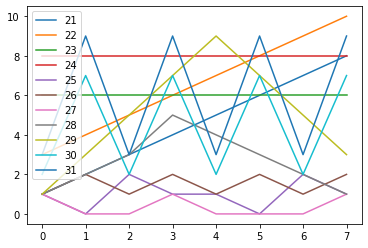

In [42]:
df.T.plot()

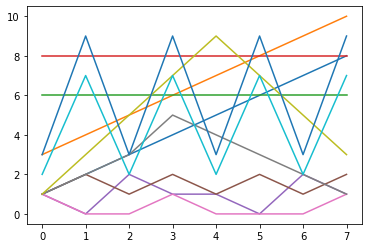

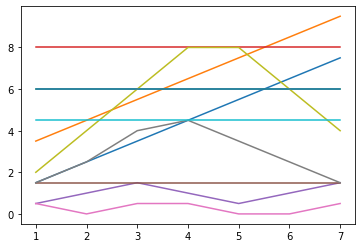

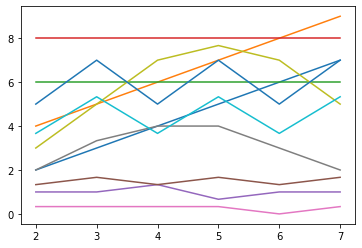

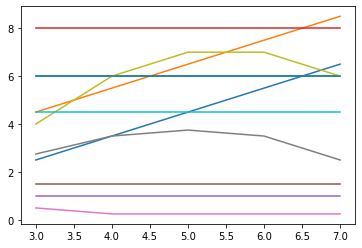

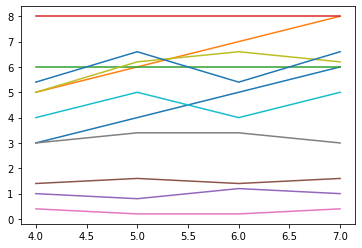

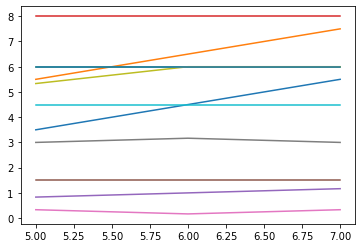

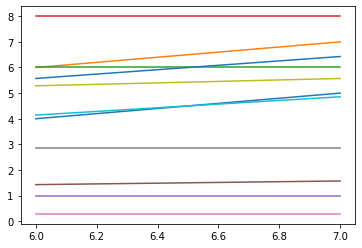

In [43]:
for i in range(1,8):
    df.T.rolling(i).mean().plot(legend=False)
    plt.show()

Increasing the rolling window makes the lines more flat. (defining level?)
Now we need something to make the lines more spikey.

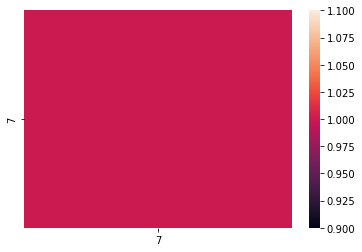

In [44]:
for i in range(7,8):
    sns.heatmap(df.T.diff(i)[i:].T.corr())

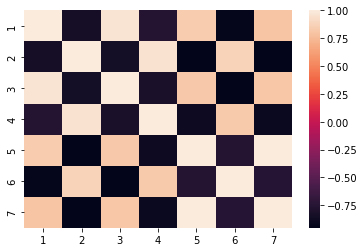

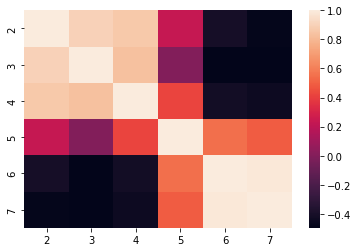

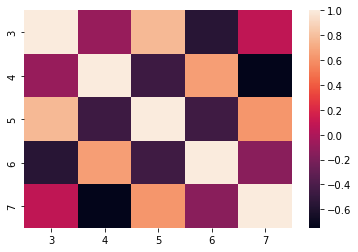

In [45]:
for i in range(1,4):
    sns.heatmap(df.T.diff(i)[i:].T.corr())
    plt.show()

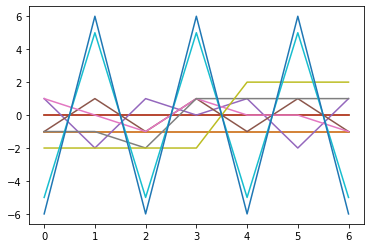

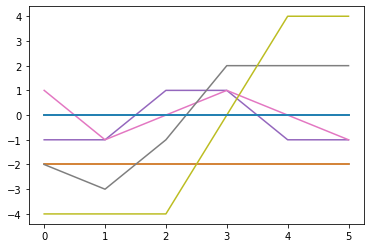

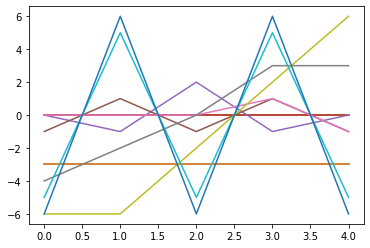

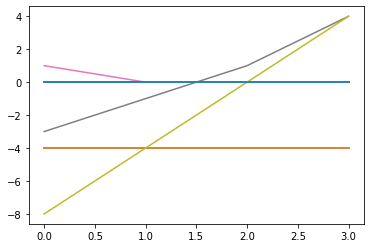

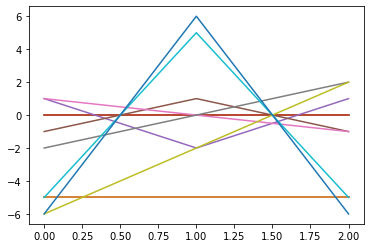

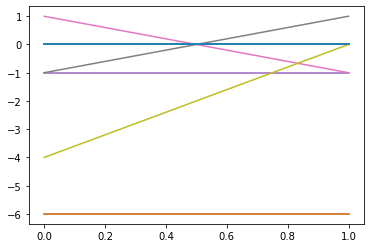

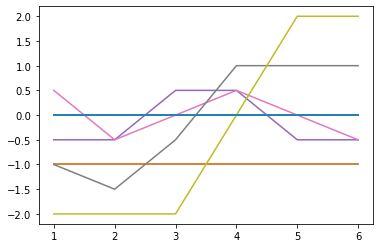

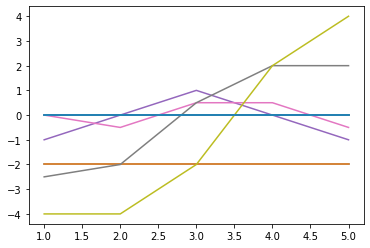

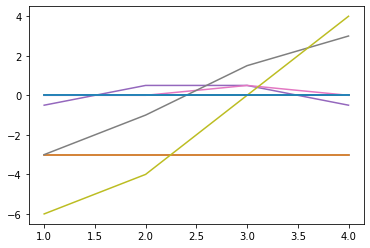

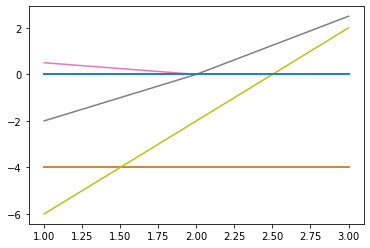

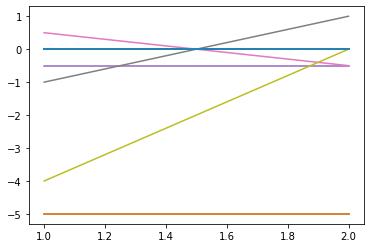

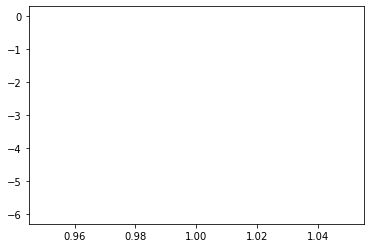

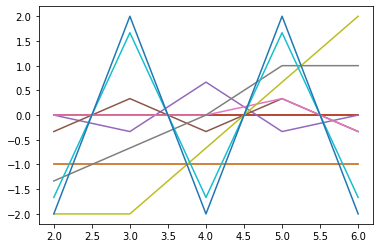

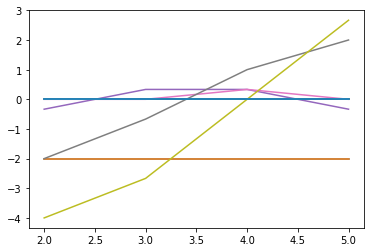

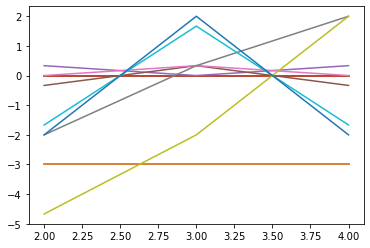

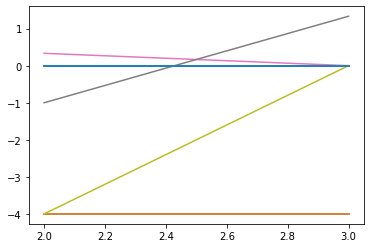

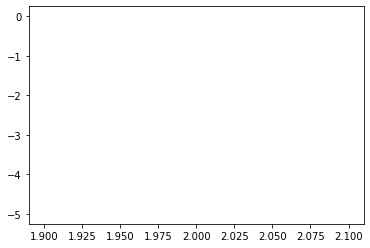

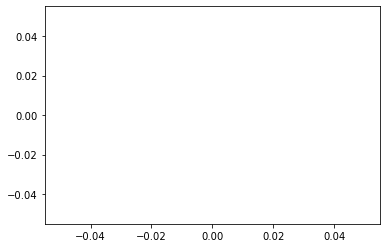

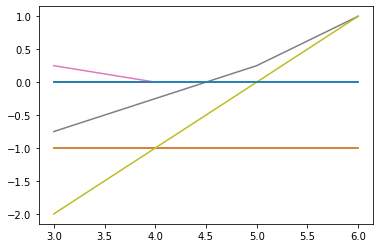

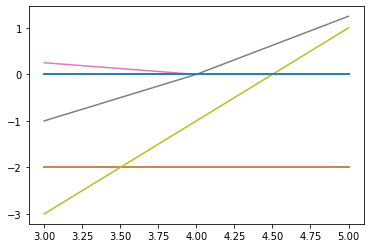

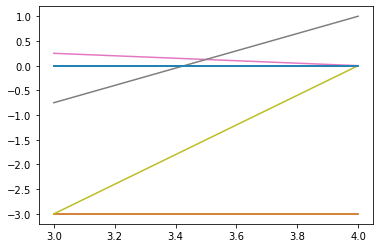

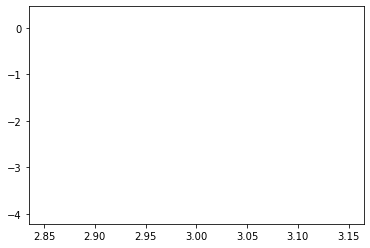

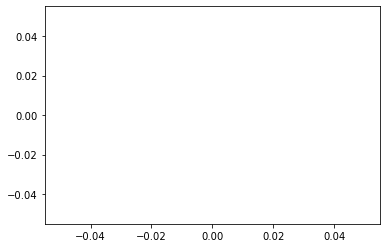

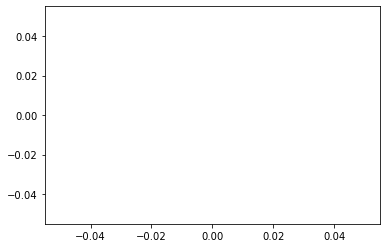

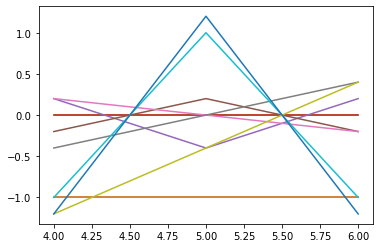

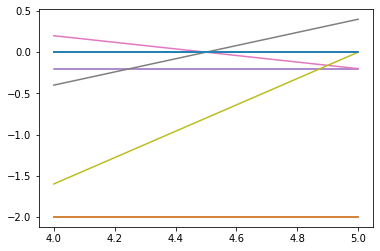

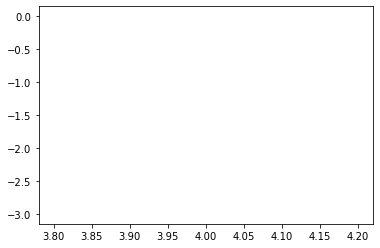

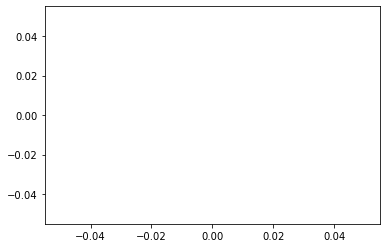

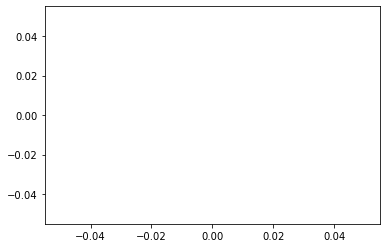

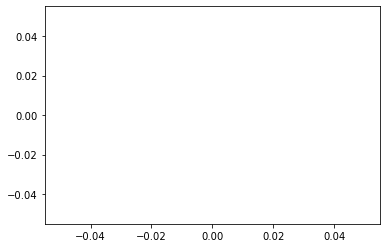

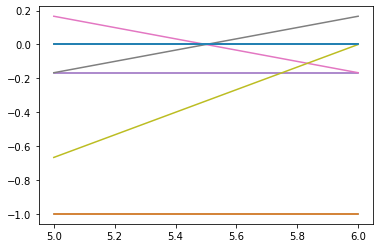

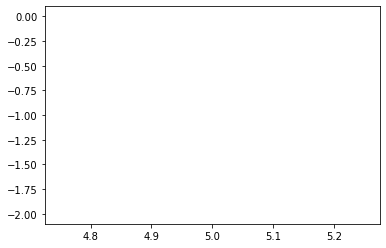

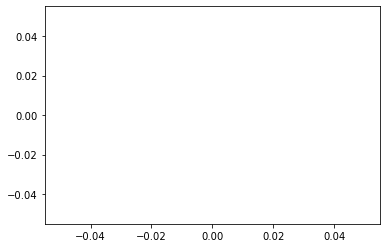

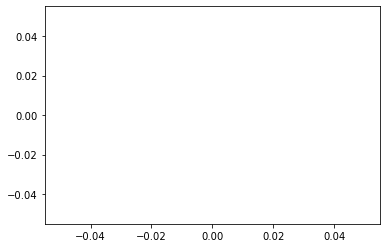

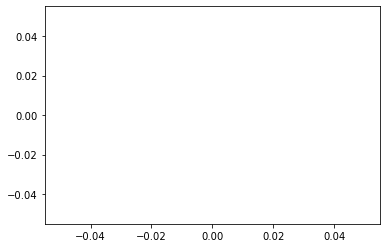

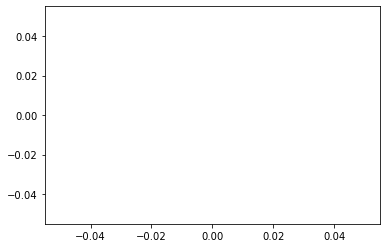

In [46]:
for i in range(1,7):
    for j in range(1,7):
        df.T.rolling(i).mean().diff(-j).plot(legend=False)
        plt.show()

<AxesSubplot:>

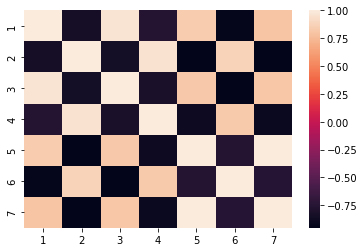

In [47]:
sns.heatmap(df.T.diff(1)[1:].T.corr())

We could say that our time period nodes are correlated in this way. But what about the purchases of households?

<AxesSubplot:>

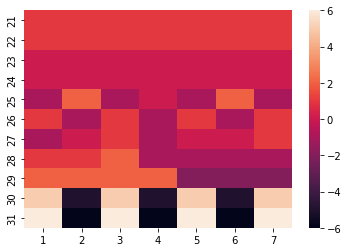

In [48]:
sns.heatmap(df.T.diff(1)[1:].T)

In [49]:
import dtcj

In [15]:
kmeans_model = KMeans(n_clusters=5)

In [16]:
kmeans_model.fit(df)

KMeans(n_clusters=5)

In [17]:
kmeans_model.predict(df)

array([3, 3, 2, 2, 0, 0, 0, 0, 4, 1, 1])

So, we had one "wrong" answer. 

In [18]:
kmeans_model.cluster_centers_.shape

(5, 8)

In [19]:
for x in [0,4,1,3,2]:
    print('Label', x, kmeans_model.cluster_centers_[x], end='\n')

Label 0 [1.   1.   1.5  2.25 1.5  1.25 1.25 1.25]
Label 4 [1. 3. 5. 7. 9. 7. 5. 3.]
Label 1 [2.5 8.  2.5 8.  2.5 8.  2.5 8. ]
Label 3 [2. 3. 4. 5. 6. 7. 8. 9.]
Label 2 [7. 7. 7. 7. 7. 7. 7. 7.]


In [20]:
patterns

[[1, 2, 3, 4, 5, 6, 7, 8],
 [3, 4, 5, 6, 7, 8, 9, 10],
 [6, 6, 6, 6, 6, 6, 6, 6],
 [8, 8, 8, 8, 8, 8, 8, 8],
 [1, 0, 2, 1, 1, 0, 2, 1],
 [1, 2, 1, 2, 1, 2, 1, 2],
 [1, 0, 0, 1, 0, 0, 0, 1],
 [1, 2, 3, 5, 4, 3, 2, 1],
 [1, 3, 5, 7, 9, 7, 5, 3],
 [2, 7, 2, 7, 2, 7, 2, 7],
 [3, 9, 3, 9, 3, 9, 3, 9]]

The model interpreted each step in the timeseries as a distinct feature, and created a centroid for each? It made it's mistake 

Instead of defining a bunch of similar timeseries to check this out further, what if we broke it down into 4 clusters;

- people who didnt spend early, but spent later

- people who spent early, but didn't spend later

- people who spent all the time

- people who didn't spend at all


and we could also add:

- people who spent in the middle

but let's not.




### Let's go deeper

In [ ]:
new_patterns = [
    
    # people who spent early but not late
    [4,3,7,4,3,2,2,3],
    [4,8,5,3,2,2,1,1],
    [7,6,8,4,4,2,2,1],
    
    # people who didn't spend early but spent late
    [4,3,2,2,6,6,7,8],
    [2,2,1,6,6,8,7,5],
    [1,1,3,4,5,7,8,5],
    
    # people who spent well all the time
    [4,4,5,4,5,6,7,8],
    [6,7,6,8,7,6,5,3],
    [3,4,6,5,6,7,8,9],
    
    # people who rarely spent
    [1,0,5,4,2,1,1,0],
    [0,3,2,1,4,5,2,1],
    [1,2,3,2,1,2,3,2]
    
]

In [ ]:
kmeans_deep_model = KMeans(n_clusters=4)

kmeans_model.fit(new_patterns)

In [23]:
pd.DataFrame(new_patterns, index=kmeans_model.predict(new_patterns)).sort_index()

,0,1,2,3,4,5,6,7
0,6,7,6,8,7,6,5,3
1,4,3,7,4,3,2,2,3
1,4,8,5,3,2,2,1,1
1,7,6,8,4,4,3,3,4
2,4,3,2,2,6,6,7,8
2,4,4,5,4,5,6,7,8
2,3,4,6,5,6,7,8,9
3,1,0,5,4,2,1,1,0
3,0,3,2,1,4,5,2,1
3,1,2,3,2,1,2,3,2


I'd like to give the model a series of differences from the row-wise mean.

In [24]:
patterns[0]

[1, 2, 3, 4, 5, 6, 7, 8]

In [25]:
np.mean(patterns[0])

4.5

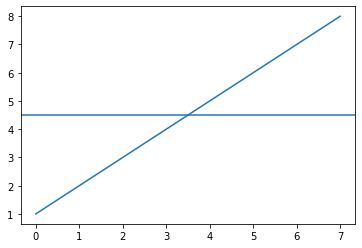

In [26]:
plt.figure()
plt.axhline(4.5)
plt.plot(pd.Series(patterns[0]))

In [27]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

lin_model.fit(X=pd.DataFrame(patterns[0]), y=[np.mean(patterns[0]) for x in patterns[0]])

lin_model.intercept_

4.5

In [28]:
lin_model.coef_

array([0.])

Based on the underlying tenets of homescedasticity, this line is following a directly linear path.

In [29]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso

In [30]:
lin_model.intercept_

4.5

In [31]:
def run_linear_test(patterns):
    
    def fit_linear_model(line, model):
        lin_model = model()

        lin_model.fit(X=pd.DataFrame(line), y=[np.mean(line) for x in line])

        return (lin_model.coef_, lin_model.intercept_)
    
    for x in patterns:
        print(x)
        print(fit_linear_model(x, LinearRegression))
        print(fit_linear_model(x, Ridge))
        print(fit_linear_model(x, ElasticNet))
        print(fit_linear_model(x, Lasso))

In [32]:
run_linear_test(patterns)

[1, 2, 3, 4, 5, 6, 7, 8]
(array([0.]), 4.5)
(array([0.]), 4.5)
(array([0.]), 4.5)
(array([0.]), 4.5)
[3, 4, 5, 6, 7, 8, 9, 10]
(array([0.]), 6.5)
(array([0.]), 6.5)
(array([0.]), 6.5)
(array([0.]), 6.5)
[6, 6, 6, 6, 6, 6, 6, 6]
(array([0.]), 6.0)
(array([0.]), 6.0)
(array([0.]), 6.0)
(array([0.]), 6.0)
[8, 8, 8, 8, 8, 8, 8, 8]
(array([0.]), 8.0)
(array([0.]), 8.0)
(array([0.]), 8.0)
(array([0.]), 8.0)
[1, 0, 2, 1, 1, 0, 2, 1]
(array([-0.]), 1.0)
(array([0.]), 1.0)
(array([0.]), 1.0)
(array([0.]), 1.0)
[1, 2, 1, 2, 1, 2, 1, 2]
(array([0.]), 1.5)
(array([0.]), 1.5)
(array([0.]), 1.5)
(array([0.]), 1.5)
[1, 0, 0, 1, 0, 0, 0, 1]
(array([-0.]), 0.375)
(array([0.]), 0.375)
(array([0.]), 0.375)
(array([0.]), 0.375)
[1, 2, 3, 5, 4, 3, 2, 1]
(array([0.]), 2.625)
(array([0.]), 2.625)
(array([0.]), 2.625)
(array([0.]), 2.625)
[1, 3, 5, 7, 9, 7, 5, 3]
(array([0.]), 5.0)
(array([0.]), 5.0)
(array([0.]), 5.0)
(array([0.]), 5.0)
[2, 7, 2, 7, 2, 7, 2, 7]
(array([0.]), 4.5)
(array([0.]), 4.5)
(array([0

C:\Users\polan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\polan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\polan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\polan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

So what I'm doing is comparing the series to its own mean; instead of to itself.

In [33]:
def run_linear_test(patterns):
    
    def fit_linear_model(line, model):
        lin_model = model()

        lin_model.fit(X=pd.DataFrame(line), y=pd.DataFrame(line))

        return (lin_model.coef_, lin_model.intercept_)
    
#     def return_df(x):
#         output = pd.DataFrame()
        
#         fit_predict_names = ['std', 'pattern', 'Vanilla', 'Ridge', 'ElasticNet', 'Lasso']

#         fit_predict_models = [np.std(x), 
#                               x,
#                               fit_linear_model(x, LinearRegression),
#                              fit_linear_model(x, Ridge),
#                             fit_linear_model(x, ElasticNet),
#                             fit_linear_model(x, Lasso),
#                              ]
#         output = output.append(list(zip(fit_predict_names, fit_predict_models)), ignore_index=True)
#         return output
        
    for x in patterns:
        fit_linear_model(x, LinearRegression)

In [34]:
run_linear_test(patterns)

In [35]:
list(zip(fit_predict_names, fit_predict_models))

NameError: name 'fit_predict_names' is not defined

In [ ]:
run_linear_test(patterns)

In [ ]:

for x, row in enumerate(patterns):
    residuals = pd.Series(row) - np.mean(row)
    residuals.plot(label=x)

In [ ]:
[pd.Series(x).plot() for x in patterns];
# [plt.axhline(pd.Series(x).mean(), color='black') for x in patterns];

What I want is to estimate both level and trend.

Why not just bin the households by some spend category first; and then examine for event-driven purchase behaviour. 



If...if we are trying to distinguish a household's spend on the column level, that is to say, their spend during a particular time node (feature), as a row-wise feature decomposition; we could fit a minmax scaler to each column in turn, before str

# Examining Daily Sales over time using Moving Averages

In [50]:
import dtcj

In [51]:
merged = dtcj.load_merged()

In [52]:
class SalesTable:
    
    def __init__(self, 
             df,
             sales_col='SALES_VALUE',
             customer_id='household_key',
             dt_col='datetime',
            ):
        '''Accept a pandas DataFrame as `df`; must also pass all default parameters.

        This will just be a table of sales. We can assume three columns:
            `sales value`; a sales column, for orders or items
            `customer id`; customer identifier
            `date time`; a date and time of purchase
            
        We're gonna try to make this transactions table tell us something about our customers.
        
        Any number of simple calculations could be stored about this table as statistics; as well as visualizations,
        transformations, returned feature/target spaces, class label process etc.


        '''
        # identifying sales, ID, datetime column names
        self.sales_col = sales_col
        self.customer_id =  customer_id
        self.dt_col = dt_col
        
        # loading passed dataframe
        self.df = df
        # identify customer id set
        self.customer_ids = list(self.df[self.customer_id].unique()) # wrap these two in a load_df wrapper/setter


    # sales over time plots
    def sales_over_time(self, 
                    sales_cols=['SALES_VALUE',],
                    resample_rule = 'BQ', # only works for datetime.
                    hh_keys=None
                       ):
        """return the sales series for one or many given `customer_id`s
 


        By segmenting this way, I can produce timeseries by sample size and resample group
        such as to form a tensor/matrix of sales over time for various categories

        The similarity across matrices will then represent purchase behaviour. 

        We could additionally provide RFM attributes or other variables over time to add depth to our matrix of timeseries points;
            -> null errors with churn, customer acquisition

        This would provide an accurate representation of **purchase behaviour over time**, such as noticeable by our data...

        We don't need to use deep learning to compare these behaviours against direct marketing campaigns
                -> we are not investigating whether customers knew about the sales -->
                    -> we have a small sample group of targeted households, is their behaviour noticeably affected
                        -> versus a control group of similar-purchasing-households? similar demographics?


        """

        # allow list-based filtering...
        if hh_keys==None:
            hh_keys = self.customer_ids


        ## record fails and outputs
        idx = []
#         fails = []
        output = pd.DataFrame()
        for hh in hh_keys:
            try:
                for col in sales_cols:
#                 print(col)
#                     idx.append(f'{resample_rule}-{col}-{hh}')?
#                     or should the datetime axis be renamed?

                    idx.append(hh)
                
                    output=output.append(self.df[self.df[self.customer_id]==hh].resample(resample_rule, on=self.dt_col)[col].sum(), ignore_index=True)
            except:
#                 fails.append(f'{col}-{hh}')
#                 fails.append(hh)
                pass
#             else:
#                 idx.append(f'{self.sales_col}-{hh}')
#                 try:
#                     output=output.append(self.df[self.df[self.customer_id]==hh].resample(resample_rule, on=self.dt_col)[sales_cols[0]].sum(), ignore_index=True)
#                 except:
#                     fails.append(f'{self.sales_col}-{hh}')
#                     pass
                
                
    #     assert all(hh_keys == list(output.index)) ## what a terrible assertion dude..don't pass thru constructor

        output.index = idx
        output.index.name='household_key'
#         output.fillna(0, inplace=True) ### these nulls indicate non-existent household??
                                        ### there are other 0's in the data, between full columns.

        return output
    
#     def __repr__(self):
#         return pprint.pprint(f"Transactions Table Object\nSales Column : {self.sales_col}\nCustomer ID Column : {self.customer_id}\nDateTime Column : {self.dt_col}\nShape of DF : {self.df.shape}\nNumber of Customers : {len(self.customer_ids)}\
#             ")


In [53]:
Merged = SalesTable(merged)

In [54]:
daily_hh = Merged.sales_over_time(hh_keys=range(1,11), resample_rule='D').fillna(0)

In [55]:
daily_hh

,2004-07-01,2004-07-02,2004-07-03,2004-07-04,2004-07-05,2004-07-06,2004-07-07,2004-07-08,2004-07-09,2004-07-10,...,2006-02-18,2006-02-19,2006-02-20,2006-02-21,2006-02-22,2006-02-23,2006-02-24,2006-02-25,2006-02-26,2006-02-27
household_key,,,,,,,,,,,,,,,,,,,,,
1,53.45,0.0,0.0,0.00,0.0,0.0,0.00,26.76,0.0,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,81.29,0.00
2,0.00,0.0,22.7,0.00,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
3,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.0,36.38,0.0,0.0,0.00,0.00
4,0.00,0.0,0.0,126.24,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
5,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.0,12.99,0.0,0.0,0.00,0.00
6,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,33.05,61.99
7,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,111.79,0.0,0.00,0.0,0.0,0.00,49.02
8,18.66,0.0,0.0,0.00,17.3,0.0,8.82,0.00,0.0,0.00,...,0.0,144.69,0.0,0.00,0.0,0.00,0.0,0.0,52.66,0.00
9,0.00,0.0,0.0,15.54,0.0,0.0,0.00,0.00,0.0,15.73,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00


To examine these daily sales totals as a timeseries, one way to normalize our input is to utilize moving averages.

Based on our previous timeseries notebook, we know that in general there is a 2-4 day negative correlation, as well as a 6-8 day positive correlation. 

In [ ]:
daily_hh.T.resample('BM').mean().plot()

# Below we can see the monthly sales for our ten households.

In [ ]:
rolling_4_hh = daily_hh.T.rolling(4).mean()

In [ ]:
rolling_4_hh.plot(kind='hist', alpha=0.5)

In [ ]:
rolling_4_hh.plot()

In the plot above, we can see with more definition where spikes in spending occurred. We can then examine for correlations with advertising campaigns that occurred during those 4-day windows.

In [ ]:
rolling_8_hh = daily_hh.T.rolling(8).mean()
rolling_8_hh.plot()

These sorts of choices about developing signals seem to be hugely important in the realm of timeseries (and all causal/event-driven phenomena!).

In [ ]:
rolling_33_hh = daily_hh.T.rolling(33).mean()

from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler().fit_transform(rolling_33_hh.dropna())
scaled

results = pd.DataFrame(scaled, index=rolling_33_hh.dropna().index, columns= rolling_33_hh.columns)

Using 7 days as a differential (below) introduces a 2-week purchasing period bias of some sort into our findings? 1-day differential will be similar... We've already taken 7-day moving average as the window of choice. At first glance that seems ok -- it allows us to group more frequently-purchasing households more closely?

In [ ]:
results.plot()

In [ ]:
sns.heatmap(pd.concat([results, daily_hh.T.rolling(33).mean().dropna()], axis=1).corr())

We've managed to keep our number of data points relatively protected by averaging the sales over 33 days at a daily level.

Above in the heatmap we can see that the scaled values directly correlate with the unscaled data points.

In [ ]:
import seaborn as sns

In [ ]:
results.corr()

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(results.corr(), vmax=1, annot=True, cbar=False)

In [ ]:
results.loc[:,[7,8]].plot()

33-day rolling mean of daily sales for households 7 and 8 have a correlation of 0.52; we can see how closely they match each other after scaling. Their sales totals are below;

In [ ]:
daily_hh.loc[[7,8],:].sum(axis=1)

In [ ]:
results.loc[:,[8,9]].plot()

33-day rolling mean of daily sales for households 8 and 9 have a correlation of 0.12. We can see that similar purchase behaviour is exhibited in some places, but the frequency of purchase seems to be much lower for household 9. The sums of their purchases are below;

In [ ]:
daily_hh.loc[[8,9],:].sum(axis=1)

One group that stands out above is some mutual correlations between several households; 3 with 4, 5, and 6, respectively.

In [ ]:
results.loc[:,[4,6]].plot(alpha=0.4)
plt.plot(results.loc[:,[3]],alpha=1, label=3)
plt.legend();

In [ ]:
results.loc[:,[2,5]].plot(alpha=0.4)
plt.plot(results.loc[:,[3]],alpha=1, label=3)
plt.legend()

In [ ]:
results.iloc[:,[7,2]].plot()
# households 7 and 2 have a negative correlation; they behave in opposite ways

The loop below creates a dictionary, output, and then iterates through the correlation matrix.

For each household, it records which other households had a similar min-maxed sales value, at the same time (over a 33-day average period). This is a threshold which can be set in the lowest level of the loop:

In [ ]:
output = dict()
for col in results.corr():
    output[col] = []
    for idx, val in results.corr()[col].iteritems():
#         print(idx,val)
        if val > 0.2: # threshold here
            output[col].append((idx, val))

In [ ]:
[(len(x)) for x in output.values()]

So, household 4 has the most correlations with other households, above a threshold of 0.2. We're lucky that we didn't have to deal with indexing errors (we had household_key in the range 1-10), but that's something to consider. Note the distinction between referencing integer-based row ids using .loc versus .iloc; .T is very useful here.

Let's take all of the above and form a function to perform the whole process on our data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
def create_timeseries_average(SalesTable, hh_keys=None, resample_rule='D', rolling=33):
    from sklearn.preprocessing import MinMaxScaler

    if hh_keys == None:
        hh_keys = SalesTable.customer_ids
    
    # create daily_hh
    daily_hh = SalesTable.sales_over_time(hh_keys=hh_keys, resample_rule=resample_rule).fillna(0) 
   
    rolling_hh = daily_hh.T.rolling(rolling).mean()
    

    scaled = MinMaxScaler().fit_transform(rolling_hh.dropna())
    results = pd.DataFrame(scaled, index=rolling_hh.dropna().index, columns= rolling_hh.columns)
    
    return results
    

Using the function above we can examine for similarity and also dissimilarity. By using some sort of optimizer function we can iteratively group or cluster our households based on certain rules or tenets; ie; this is k-means clustering with group-specific options?

In [129]:
results = create_timeseries_average(Merged, hh_keys=[1,2,3,4,5,6,7,8,9,10])
results

household_key,1,2,3,4,5,6,7,8,9,10
2004-08-02,0.477007,0.303193,0.114120,6.143365e-01,0.313510,0.111987,0.000000,0.228615,0.330094,0.40715
2004-08-03,0.297987,0.303193,0.114120,6.143365e-01,0.313510,0.111987,0.000000,0.196414,0.330094,0.40715
2004-08-04,0.297987,0.303193,0.114120,6.143365e-01,0.313510,0.229880,0.000000,0.196414,0.330094,0.40715
2004-08-05,0.297987,0.232755,0.238556,6.143365e-01,0.313510,0.229880,0.000000,0.196414,0.330094,0.40715
2004-08-06,0.590850,0.232755,0.238556,0.000000e+00,0.313510,0.229880,0.000000,0.196414,0.246208,0.40715
...,...,...,...,...,...,...,...,...,...,...
2006-02-23,0.727736,0.000000,0.098489,6.915594e-17,0.159279,0.104313,0.674705,0.637906,0.265047,0.30512
2006-02-24,0.727736,0.000000,0.098489,6.915594e-17,0.159279,0.080456,0.674705,0.637906,0.265047,0.30512
2006-02-25,0.727736,0.000000,0.098489,6.915594e-17,0.159279,0.080456,0.674705,0.637906,0.265047,0.30512
2006-02-26,1.000000,0.000000,0.098489,6.915594e-17,0.159279,0.122893,0.674705,0.636025,0.265047,0.30512


The process seems to be extremely computationally intensive. For an initial customer analysis it may be necessary.

In [130]:
from collections import defaultdict

In [134]:
def process_timeseries_average(results, threshold=0.2):
    output = defaultdict(list)

    if threshold > 0: # positive threshold
        for col in sorted(results.corr()):
            for idx, val in results.corr()[col].iteritems():
        #         print(idx,val)
                if idx != col:

                    if val > threshold: # threshold here
                        output[col].append(idx)

    
    elif threshold < 0: # negative threshold
        for col in sorted(results.corr()):
            for idx, val in results.corr()[col].iteritems():
        #         print(idx,val)
                if idx != col:
                    if val < threshold: # threshold here
                        output[col].append(idx)

                    
    return output

In [135]:
output = process_timeseries_average(results, threshold=0.5)

In [136]:
output

defaultdict(list, {3: [4], 4: [3], 7: [8], 8: [7]})

In [137]:
negative_output = process_timeseries_average(results, threshold=-0.5)

In [138]:
negative_output

defaultdict(list, {6: [7], 7: [6]})

In [ ]:
merged_ts_33 = create_timeseries_average(Merged)

merged_ts_33

In [140]:
process_timeseries_average(merged_ts_33)

KeyboardInterrupt: 

# K-means clustering

In [ ]:
model = KMeans(n_clusters=5)

model.fit(results.T)

model_predictions = model.predict(results.T)

In [ ]:
model_predictions

In [ ]:
rolling_7_hh_mm_scaled.T.iloc[[1,2,3,4,8,9],:].mean().T.plot()

In [ ]:
rolling_7_hh_mm_scaled.T.iloc[[0,5,6,7],:].mean().T.plot()